### **Instructions**

1. **Environment Setup:**
   - This notebook will automatically install all necessary packages.
   - It uses a simulated in-memory MongoDB-like database for local execution.

2. **Dataset:**
   - The dataset contains detailed movie information, including title, year, genre, ratings, director, cast, and box office collection.

3. **Tasks:**
   Complete the following tasks in this notebook. Each section contains specific instructions.

---

In [1]:
# Install necessary packages
def install_packages():
    !pip install pymongo
    !pip install mongomock
    !pip install matplotlib
    !pip install pandas
    !pip install dnspython --quiet

In [3]:
install_packages()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 2.3 MB/s eta 0:00:00
  Created wheel for sentinels: filename=sentinels-1.0.0-py3-none-any.whl size=3172 sha256=c01651c59999c7b656b3d12c2f0ecb2cc584609ec59e6e231e256cf41055018a
  Stored in directory: /root/.cache/pip/wheels/39/e6/05/d0ca91a2c6be3e4b2a6b4e721fe778f9186b9a383ea05300e8
Successfully built sentinels


#### **Task 1: Setting Up MongoDB Connection**

In [5]:
# Import required libraries
from pymongo import MongoClient
import mongomock
import pandas as pd
import matplotlib.pyplot as plt
import json

In [6]:
# Simulate MongoDB with mongomock
client = mongomock.MongoClient()
db = client["big_data_assignment"]
movies_collection = db["movies"]


In [50]:
# Dataset
movies_data = [
    {
        "title": "Inception",
        "year": 2010,
        "genre": ["Action","Sci-Fi"],
        "ratings": 8.8,
        "director": "Christopher Nolan",
        "cast": ["Leonardo DiCaprio", "Joseph Gordon-Levitt"],
        "box_office": 829851444
    },

{
    "title": "Forrest Gump",
    "year": 1994,
    "genre": ["Drama", "Romance"],
    "ratings": 8.8,
    "director": "Robert Zemeckis",
        "cast": ["Tom Hanks", "Robin Wright"],
        "box_office": 678222284
        },

  {
       "title": "The Matrix",
    "year": 2001,
    "genre": ["Action","Sci-Fi"],
    "ratings": 8.7,
    "director": "The Wachowskis",
        "cast": ["Keanu Reeves", "Al Pacino"],
        "box_office": 4635173830000

}


]

In [30]:
# Insert data into the simulated database
movies_collection.insert_many(movies_data)
print("Simulated database initialized and data inserted successfully!")

Simulated database initialized and data inserted successfully!


#### **Task 2: Basic Data Exploration**

In [31]:
# 1. Movies released after 2000
movies_after_2000 = list(movies_collection.find({"year": {"$gt": 2000}}))
print("Movies after 2000:", movies_after_2000)

Movies after 2000: [{'title': 'Inception', 'year': 2010, 'genre': ['Action', 'Sci-Fi'], 'ratings': 8.8, 'director': 'Christopher Nolan', 'cast': ['Leonardo DiCaprio', 'Joseph Gordon-Levitt'], 'box_office': 829851444, '_id': ObjectId('67b2589cec6e923ddd838996')}, {'title': 'Inception', 'year': 2010, 'genre': ['Action', 'Sci-Fi'], 'ratings': 8.8, 'director': 'Christopher Nolan', 'cast': ['Leonardo DiCaprio', 'Joseph Gordon-Levitt'], 'box_office': 829851444, '_id': ObjectId('67b261a7ec6e923ddd83899a')}, {'title': 'The Matrix', 'year': 2001, 'genre': ['Action', 'Sci-Fi'], 'ratings': 8.7, 'director': 'The Wachowskis', 'cast': ['Keanu Reeves', 'Laurence Fishburne'], 'box_office': 4635173830000, '_id': ObjectId('67b261a7ec6e923ddd83899c')}]


In [32]:
# 2. Movies in the "Action" genre
action_movies = list(movies_collection.find({"genre": "Action"}))
print("Action movies:", action_movies)


Action movies: [{'title': 'Inception', 'year': 2010, 'genre': ['Action', 'Sci-Fi'], 'ratings': 8.8, 'director': 'Christopher Nolan', 'cast': ['Leonardo DiCaprio', 'Joseph Gordon-Levitt'], 'box_office': 829851444, '_id': ObjectId('67b2589cec6e923ddd838996')}, {'title': 'The Matrix', 'year': 1999, 'genre': ['Action', 'Sci-Fi'], 'ratings': 8.7, 'director': 'The Wachowskis', 'cast': ['Keanu Reeves', 'Laurence Fishburne'], 'box_office': 463517383, '_id': ObjectId('67b2589cec6e923ddd838998')}, {'title': 'Inception', 'year': 2010, 'genre': ['Action', 'Sci-Fi'], 'ratings': 8.8, 'director': 'Christopher Nolan', 'cast': ['Leonardo DiCaprio', 'Joseph Gordon-Levitt'], 'box_office': 829851444, '_id': ObjectId('67b261a7ec6e923ddd83899a')}, {'title': 'The Matrix', 'year': 2001, 'genre': ['Action', 'Sci-Fi'], 'ratings': 8.7, 'director': 'The Wachowskis', 'cast': ['Keanu Reeves', 'Laurence Fishburne'], 'box_office': 4635173830000, '_id': ObjectId('67b261a7ec6e923ddd83899c')}]


In [33]:
# 3. Top 5 movies with highest ratings
top_movies = list(movies_collection.find().sort("ratings", -1).limit(5))
print("Top 5 movies by ratings:", top_movies)

Top 5 movies by ratings: [{'title': 'Forrest Gump', 'year': 1994, 'genre': ['Drama', 'Romance'], 'ratings': 9.3, 'director': 'Robert Zemeckis', 'cast': ['Tom Hanks', 'Robin Wright'], 'box_office': 678222284, '_id': ObjectId('67b2589cec6e923ddd838997')}, {'title': 'Inception', 'year': 2010, 'genre': ['Action', 'Sci-Fi'], 'ratings': 8.8, 'director': 'Christopher Nolan', 'cast': ['Leonardo DiCaprio', 'Joseph Gordon-Levitt'], 'box_office': 829851444, '_id': ObjectId('67b2589cec6e923ddd838996')}, {'title': 'Inception', 'year': 2010, 'genre': ['Action', 'Sci-Fi'], 'ratings': 8.8, 'director': 'Christopher Nolan', 'cast': ['Leonardo DiCaprio', 'Joseph Gordon-Levitt'], 'box_office': 829851444, '_id': ObjectId('67b261a7ec6e923ddd83899a')}, {'title': 'Forrest Gump', 'year': 1994, 'genre': ['Drama', 'Romance'], 'ratings': 8.8, 'director': 'Robert Zemeckis', 'cast': ['Tom Hanks', 'Robin Wright'], 'box_office': 678222284, '_id': ObjectId('67b261a7ec6e923ddd83899b')}, {'title': 'The Matrix', 'year': 

In [34]:
# 4. Count of movies in each genre
pipeline = [
    {"$unwind": "$genre"},
    {"$group": {"_id": "$genre", "count": {"$sum": 1}}},
    {"$sort": {"count": -1}}
]
genre_counts = list(movies_collection.aggregate(pipeline))
print("Movies per Genre:", genre_counts)

Movies per Genre: [{'count': 4, '_id': 'Action'}, {'count': 4, '_id': 'Sci-Fi'}, {'count': 2, '_id': 'Drama'}, {'count': 2, '_id': 'Romance'}]


In [35]:
# 5. Movies directed by "Christopher Nolan"
nolan_movies = list(movies_collection.find({"director": "Christopher Nolan"}))
print("Christopher Nolan Movies:", nolan_movies)

Christopher Nolan Movies: [{'title': 'Inception', 'year': 2010, 'genre': ['Action', 'Sci-Fi'], 'ratings': 8.8, 'director': 'Christopher Nolan', 'cast': ['Leonardo DiCaprio', 'Joseph Gordon-Levitt'], 'box_office': 829851444, '_id': ObjectId('67b2589cec6e923ddd838996')}, {'title': 'Inception', 'year': 2010, 'genre': ['Action', 'Sci-Fi'], 'ratings': 8.8, 'director': 'Christopher Nolan', 'cast': ['Leonardo DiCaprio', 'Joseph Gordon-Levitt'], 'box_office': 829851444, '_id': ObjectId('67b261a7ec6e923ddd83899a')}]


#### **Task 3: Indexing and Schema Validation**

In [36]:
# 1. Create an index on the `title` field
movies_collection.create_index("title")
print("Index on title created.")

Index on title created.


In [37]:
# 2. Create a compound index on `year` and `genre`
movies_collection.create_index([("year", 1), ("genre", 1)])
print("Compound index on year and genre created.")

Compound index on year and genre created.


#### **Task 4: Advanced Data Manipulation**

In [45]:
# 1. Add a new movie
new_movie = {

             "title": "Big Data Adventure",
    "year": 2024,
    "genre": ["Documentary", "Technology"],
    "ratings": 8.5,
    "director": "John Doe",
        "cast": ["Alice","Bob"],
        "box_office": 1500000000000000
}
movies_collection.insert_one(new_movie)
print("New movie added.")

New movie added.


In [46]:
# 2. Update ratings for Drama movies
movies_collection.update_many({"genre": "Drama"}, {"$inc": {"ratings": 0.5}})
print("Ratings updated for Drama movies.")

Ratings updated for Drama movies.


In [47]:
# 3. Delete movies with low box office collections
movies_collection.delete_many({"box_office": {"$lt": 100000000}})
print("Movies with low box office collections deleted.")

Movies with low box office collections deleted.


#### **Task 5: Aggregation Framework**

In [48]:
# 1. Average rating by genre
avg_rating_pipeline = [
    {"$unwind": "$genre"},
    {"$group": {"_id": "$genre", "average_rating": {"$avg": "$ratings"}}},
    {"$sort": {"average_rating": -1}}
]
avg_ratings = list(movies_collection.aggregate(avg_rating_pipeline))
print("Average ratings by genre:", avg_ratings)

Average ratings by genre: [{'average_rating': 10.05, '_id': 'Drama'}, {'average_rating': 10.05, '_id': 'Romance'}, {'average_rating': 8.75, '_id': 'Action'}, {'average_rating': 8.75, '_id': 'Sci-Fi'}, {'average_rating': 8.5, '_id': 'Documentary'}, {'average_rating': 8.5, '_id': 'Technology'}]


In [49]:
# 2. Top 3 genres by box office
top_genres_pipeline = [
    {"$unwind": "$genre"},
    {"$group": {"_id": "$genre", "avg_box_office": {"$avg": "$box_office"}}},
    {"$sort": {"total_box_office": -1}},
    {"$limit": 3}
]
top_genres = list(movies_collection.aggregate(top_genres_pipeline))
print("Top 3 genres by box office:", top_genres)

# 3. Top 5 directors by movie count
directors_pipeline = [
    {"$group": {"_id": "$director", "movie_count": {"$sum": 1}}},
    {"$sort": {"movie_count": -1}},
    {"$limit": 5}
]
top_directors = list(movies_collection.aggregate(directors_pipeline))
print("Top 5 directors:", top_directors)

Top 3 genres by box office: [{'avg_box_office': 1159324262567.75, '_id': 'Action'}, {'avg_box_office': 1500000000000000.0, '_id': 'Documentary'}, {'avg_box_office': 678222284.0, '_id': 'Drama'}]
Top 5 directors: [{'movie_count': 2, '_id': 'Christopher Nolan'}, {'movie_count': 2, '_id': 'Robert Zemeckis'}, {'movie_count': 2, '_id': 'The Wachowskis'}, {'movie_count': 1, '_id': 'John Doe'}]


#### **Task 6: Advanced Queries**

In [51]:
# 1. Movies with cast member names starting with "A"
movies_with_a = list(movies_collection.find({"cast": {"$regex": "^A", "$options": "i"}}))
print("Movies with cast member names starting with 'A':", movies_with_a)

# 2. Sci-Fi movies with specific box office range
sci_fi_movies = list(movies_collection.find({"$and": [
    {"genre": "Sci-Fi"},
    {"box_office": {"$gte": 100000000, "$lte": 100000000}}
]}))
print("Sci-Fi movies with box office between 1M and 10M:", sci_fi_movies)

Movies with cast member names starting with 'A': [{'title': 'Big Data Adventure', 'year': 2024, 'genre': ['Documentary', 'Technology'], 'ratings': 8.5, 'director': 'John Doe', 'cast': ['Alice', 'Bob'], 'box_office': 1500000000000000, '_id': ObjectId('67b261e9ec6e923ddd83899e')}]
Sci-Fi movies with box office between 1M and 10M: []


#### **Task 7: Export Data**

In [52]:
# 1. Export modified dataset to CSV
movies_df = pd.DataFrame(list(movies_collection.find()))
movies_df.to_csv("modified_movies.csv", index=False)
print("Modified dataset exported to 'modified_movies.csv'.")

# 2. Export aggregation results to CSV
avg_ratings_df = pd.DataFrame(avg_ratings)
avg_ratings_df.to_csv("avg_ratings.csv", index=False)
print("Average ratings by genre exported to 'avg_ratings.csv'.")

Modified dataset exported to 'modified_movies.csv'.
Average ratings by genre exported to 'avg_ratings.csv'.


#### **Task 8: Visualizations**

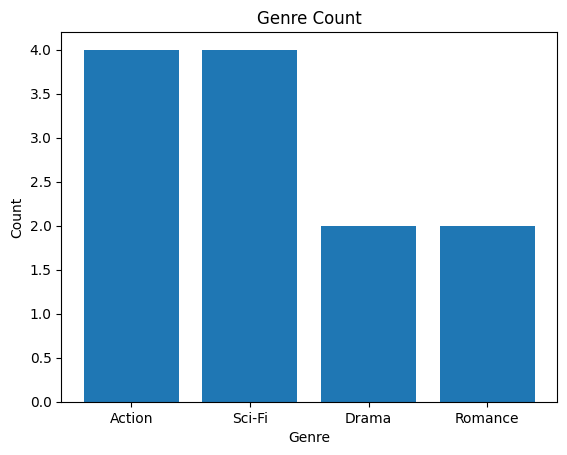

In [53]:
# Bar chart for genre count
genre_names = [genre["_id"] for genre in genre_counts]
genre_counts = [genre["count"] for genre in genre_counts]
plt.bar(genre_names, genre_counts)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Genre Count")
plt.show()

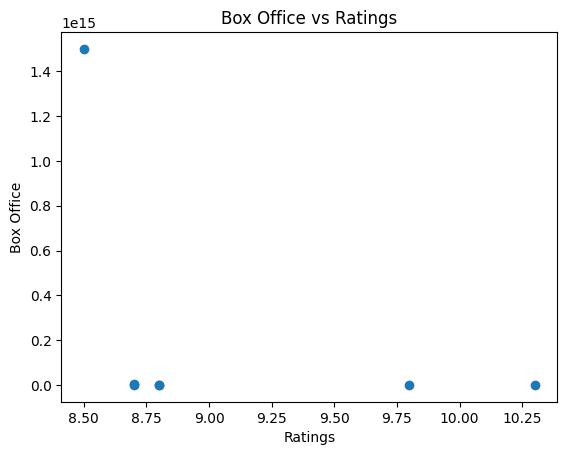

In [55]:
# Scatter plot for box office vs ratings
box_office = [movie["box_office"] for movie in movies_df.to_dict("records") if "box_office" in movie]
ratings = [movie["ratings"] for movie in movies_df.to_dict("records") if "ratings" in movie]
plt.scatter(ratings, box_office)
plt.xlabel("Ratings")
plt.ylabel("Box Office")
plt.title("Box Office vs Ratings")
plt.show()

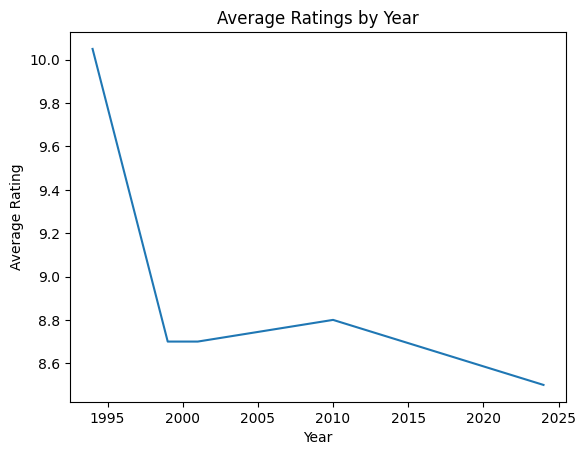

In [56]:
# Line chart for average ratings by year
avg_ratings_by_year = movies_df.groupby("year")["ratings"].mean().reset_index()
plt.plot(avg_ratings_by_year["year"], avg_ratings_by_year["ratings"])
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.title("Average Ratings by Year")
plt.show()